# Project 2

For this project, I wanted to work with data from my country because, in the medium term, I hope to return and work there, ideally for the government. I believe it’s beneficial for my learning process to apply the concepts learned in this course to data I may use in the future.

I chose higher education enrollment as my focus.

The data was downloaded from the following link:
https://datosabiertos.mineduc.cl/matricula-por-estudiante-2/

The file name in Spanish is "Matrícula por estudiante 2024," which translates to "Enrollment per Student 2024."

I downloaded data for 2019 through 2024 to analyze the evolution of enrollment over time.

In [299]:
#Import pandas library and csv module
import pandas as pd
import csv
import plotly.express as px

In [ ]:
#I downloaded the data to my computer. In this step, I read the CSV and loaded a data frame so I could work with it. 
enrollment24 = pd.read_csv("/Users/josefinadesolminihac/Desktop/computing/Project2/DataenrollmentChile/2024.csv", sep=';' )
enrollment23 = pd.read_csv("/Users/josefinadesolminihac/Desktop/computing/Project2/DataenrollmentChile/2023.csv", sep=';' )
enrollment22 = pd.read_csv("/Users/josefinadesolminihac/Desktop/computing/Project2/DataenrollmentChile/2022.csv", sep=';' )
enrollment21 = pd.read_csv("/Users/josefinadesolminihac/Desktop/computing/Project2/DataenrollmentChile/2021.csv", sep=';' )
enrollment20 = pd.read_csv("/Users/josefinadesolminihac/Desktop/computing/Project2/DataenrollmentChile/2020.csv", sep=';' )
enrollment19 = pd.read_csv("/Users/josefinadesolminihac/Desktop/computing/Project2/DataenrollmentChile/2019.csv", sep=';' )
latlon = pd.read_csv('/Users/josefinadesolminihac/Desktop/Intro to Infographics/Final Exercise/Latitud - Longitud Chile.csv', sep=',' )

/var/folders/hk/7xwmy2rx1wndbwgft1hwjm3h0000gn/T/ipykernel_80729/1441070996.py:2: DtypeWarning:

Columns (49) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/hk/7xwmy2rx1wndbwgft1hwjm3h0000gn/T/ipykernel_80729/1441070996.py:3: DtypeWarning:

Columns (49,50) have mixed types. Specify dtype option on import or set low_memory=False.



In [ ]:
# I want to see how the data looks like. I did this step with all the years to see if they had the same columns. 
enrollment24.info()

In [189]:
# I want to see how the data looks like
enrollment24.head()

,cat_periodo,id,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,...,area_carrera_generica,cine_f_13_area,cine_f_13_subarea,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
0,2024,1251127,I117S1C35J4V1,5.0,2,199105,30 a 34 años,2024,1,2024,...,Técnico en Prevención de Riesgos,Servicios,Servicios de Higiene y Salud Ocupacional,NO ACREDITADA,ACREDITADA,01/06/2022 AL 01/06/2026,4.0,0,0,1- Ingreso Directo (regular)
1,2024,119610,I45S2C4J1V1,26.0,2,200212,20 a 24 años,2022,1,2022,...,Derecho,Administración de Empresas y Derecho,Derecho,NO ACREDITADA,ACREDITADA,17/12/2021 AL 16/12/2027,6.0,0,"0,7",1- Ingreso Directo (regular)
2,2024,893498,I31S2C41J1V1,35.0,1,199711,25 a 29 años,2017,1,2017,...,Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,29/10/2019 AL 29/10/2024,5.0,258445,70000,1- Ingreso Directo (regular)
3,2024,2004738,I70S1C900J1V1,43.0,2,199007,30 a 34 años,2020,1,2020,...,Doctorado en Ciencias Sociales,"Ciencias Sociales, Periodismo e Información",Ciencias Sociales y del Comportamiento,ACREDITADA,ACREDITADA,22/12/2018 AL 22/12/2025,7.0,0,112000,1- Ingreso Directo (regular)
4,2024,812831,I143S27C34J2V1,51.0,2,198305,40 y más años,2022,1,2022,...,Técnico en Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,23/11/2022 AL 23/11/2027,5.0,858000,0,1- Ingreso Directo (regular)


In [191]:
# Because they have the same columns I wanted to have all the information in one big dataframe
dfs = [enrollment24, enrollment23, enrollment22, enrollment21, enrollment20, enrollment19]
enrollment19_24 = pd.concat(dfs)
enrollment19_24

,cat_periodo,id,codigo_unico,mrun,gen_alu,fec_nac_alu,rango_edad,anio_ing_carr_ori,sem_ing_carr_ori,anio_ing_carr_act,...,area_carrera_generica,cine_f_13_area,cine_f_13_subarea,acreditada_carr,acreditada_inst,acre_inst_desde_hasta,acre_inst_anio,costo_proceso_titulacion,costo_obtencion_titulo_diploma,forma_ingreso
0,2024,1251127,I117S1C35J4V1,5.0,2,199105,30 a 34 años,2024,1,2024,...,Técnico en Prevención de Riesgos,Servicios,Servicios de Higiene y Salud Ocupacional,NO ACREDITADA,ACREDITADA,01/06/2022 AL 01/06/2026,4.0,0,0,1- Ingreso Directo (regular)
1,2024,119610,I45S2C4J1V1,26.0,2,200212,20 a 24 años,2022,1,2022,...,Derecho,Administración de Empresas y Derecho,Derecho,NO ACREDITADA,ACREDITADA,17/12/2021 AL 16/12/2027,6.0,0,"0,7",1- Ingreso Directo (regular)
2,2024,893498,I31S2C41J1V1,35.0,1,199711,25 a 29 años,2017,1,2017,...,Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,29/10/2019 AL 29/10/2024,5.0,258445,70000,1- Ingreso Directo (regular)
3,2024,2004738,I70S1C900J1V1,43.0,2,199007,30 a 34 años,2020,1,2020,...,Doctorado en Ciencias Sociales,"Ciencias Sociales, Periodismo e Información",Ciencias Sociales y del Comportamiento,ACREDITADA,ACREDITADA,22/12/2018 AL 22/12/2025,7.0,0,112000,1- Ingreso Directo (regular)
4,2024,812831,I143S27C34J2V1,51.0,2,198305,40 y más años,2022,1,2022,...,Técnico en Enfermería,Salud y Bienestar,Salud,NO ACREDITADA,ACREDITADA,23/11/2022 AL 23/11/2027,5.0,858000,0,1- Ingreso Directo (regular)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1268478,2019,2041045,I70S1C760J2V1,NaN,1,199008,25 a 29 años,2017,1,2017,...,Magister en Administración y Comercio,Administración de Empresas y Derecho,Educación Comercial y Administración,ACREDITADA,ACREDITADA,22/12/2018 AL 22/12/2025,7.0,NaN,NaN,6- Ingreso especial para estudiantes extranjeros
1268479,2019,2055836,I86S1C924J1V1,NaN,2,198805,30 a 34 años,2019,1,2019,...,Postítulo en Ciencias Sociales,"Ciencias Sociales, Periodismo e Información",Periodismo e Información,NO ACREDITADA,ACREDITADA,01/12/2018 AL 01/12/2025,7.0,NaN,NaN,6- Ingreso especial para estudiantes extranjeros
1268480,2019,2014078,I20S1C47J4V1,NaN,1,197502,40 y más años,2018,1,2018,...,Magister en Educación,Educación,Educación,NO ACREDITADA,ACREDITADA,24/12/2017 AL 24/12/2021,4.0,NaN,NaN,6- Ingreso especial para estudiantes extranjeros
1268481,2019,2038820,I70S1C520J1V1,NaN,1,199402,25 a 29 años,2019,1,2019,...,Doctorado en Ciencias Básicas,"Ciencias naturales, matemáticas y estadística",Ciencias Físicas,ACREDITADA,ACREDITADA,22/12/2018 AL 22/12/2025,7.0,NaN,NaN,6- Ingreso especial para estudiantes extranjeros


In [61]:
#Because the names of the columns are in Spanish, and I'm not planning to use all columns, I will create a new data frame with the columns that I'm planning to use and change the names to English. 
enrollment19_24.columns

Index(['cat_periodo', 'id', 'codigo_unico', 'mrun', 'gen_alu', 'fec_nac_alu',
       'rango_edad', 'anio_ing_carr_ori', 'sem_ing_carr_ori',
       'anio_ing_carr_act', 'sem_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2',
       'tipo_inst_3', 'cod_inst', 'nomb_inst', 'cod_sede', 'nomb_sede',
       'cod_carrera', 'nomb_carrera', 'modalidad', 'jornada', 'version',
       'tipo_plan_carr', 'dur_estudio_carr', 'dur_proceso_tit',
       'dur_total_carr', 'region_sede', 'provincia_sede', 'comuna_sede',
       'nivel_global', 'nivel_carrera_1', 'nivel_carrera_2',
       'requisito_ingreso', 'vigencia_carrera', 'formato_valores',
       'valor_matricula', 'valor_arancel', 'codigo_demre', 'area_conocimiento',
       'cine_f_97_area', 'cine_f_97_subarea', 'area_carrera_generica',
       'cine_f_13_area', 'cine_f_13_subarea', 'acreditada_carr',
       'acreditada_inst', 'acre_inst_desde_hasta', 'acre_inst_anio',
       'costo_proceso_titulacion', 'costo_obtencion_titulo_diploma',
       'forma_ingr

In [73]:
#Choose the columns that I will use
filetered_data = enrollment19_24[['cat_periodo', 'codigo_unico', 'gen_alu', 'fec_nac_alu',
       'rango_edad','anio_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2',
       'tipo_inst_3', 'cod_inst', 'nomb_inst', 'cod_sede', 'nomb_sede',
       'cod_carrera', 'nomb_carrera', 'region_sede', 'provincia_sede', 'comuna_sede',
       'valor_matricula', 'valor_arancel', 'area_conocimiento', 'acreditada_carr',
       'acreditada_inst', 'acre_inst_desde_hasta', 'acre_inst_anio',
       'costo_proceso_titulacion', 'costo_obtencion_titulo_diploma']]
filetered_data.columns

Index(['cat_periodo', 'codigo_unico', 'gen_alu', 'fec_nac_alu', 'rango_edad',
       'anio_ing_carr_act', 'tipo_inst_1', 'tipo_inst_2', 'tipo_inst_3',
       'cod_inst', 'nomb_inst', 'cod_sede', 'nomb_sede', 'cod_carrera',
       'nomb_carrera', 'region_sede', 'provincia_sede', 'comuna_sede',
       'valor_matricula', 'valor_arancel', 'area_conocimiento',
       'acreditada_carr', 'acreditada_inst', 'acre_inst_desde_hasta',
       'acre_inst_anio', 'costo_proceso_titulacion',
       'costo_obtencion_titulo_diploma'],
      dtype='object')

In [79]:
#Rename the columns so they are in English and more descriptive. 
# Define a dictionary with current column names as keys and new names as values
column_renames = {
    'cat_periodo': 'Year',
    'codigo_unico': 'Unique Code',
    'gen_alu': 'Student Gender',
    'fec_nac_alu': 'Birth Date',
    'rango_edad': 'Age Range',
    'anio_ing_carr_act': 'Year Entered Current Program',
    'tipo_inst_1': 'Institution Type_1',
    'tipo_inst_2': 'Institution Type_2',
    'tipo_inst_3': 'Institution Type_3',
    'cod_inst': 'Institution Code',
    'nomb_inst': 'Institution Name',
    'cod_sede': 'Campus Code',
    'nomb_sede': 'Campus Name',
    'cod_carrera': 'Program Code',
    'nomb_carrera': 'Program Name',
    'region_sede': 'Campus Region',
    'provincia_sede': 'Campus Province',
    'comuna_sede': 'Campus Commune',
    'valor_matricula': 'Tuition Value',
    'valor_arancel': 'Fee Value',
    'area_conocimiento': 'Knowledge Area',
    'costo_proceso_titulacion': 'Graduation Process Cost',
    'costo_obtencion_titulo_diploma': 'Diploma_Cost'
}

updated_data = filetered_data.rename(columns=column_renames)
updated_data.columns

Index(['Year', 'Unique Code', 'Student Gender', 'Birth Date', 'Age Range',
       'Year Entered Current Program', 'Institution Type_1',
       'Institution Type_2', 'Institution Type_3', 'Institution Code',
       'Institution Name', 'Campus Code', 'Campus Name', 'Program Code',
       'Program Name', 'Campus Region', 'Campus Province', 'Campus Commune',
       'Tuition Value', 'Fee Value', 'Knowledge Area', 'acreditada_carr',
       'acreditada_inst', 'acre_inst_desde_hasta', 'acre_inst_anio',
       'Graduation Process Cost', 'Diploma_Cost'],
      dtype='object')

In [81]:
#Now I want to see if I need to change the type of certain columns. For example, year, birth date, and year entered current program
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7815459 entries, 0 to 1268482
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Year                          int64  
 1   Unique Code                   object 
 2   Student Gender                int64  
 3   Birth Date                    int64  
 4   Age Range                     object 
 5   Year Entered Current Program  int64  
 6   Institution Type_1            object 
 7   Institution Type_2            object 
 8   Institution Type_3            object 
 9   Institution Code              int64  
 10  Institution Name              object 
 11  Campus Code                   int64  
 12  Campus Name                   object 
 13  Program Code                  int64  
 14  Program Name                  object 
 15  Campus Region                 object 
 16  Campus Province               object 
 17  Campus Commune                object 
 18  Tuition Value              

In [137]:
#I tried changing the type int64 on the dates to date type but had problems with the visualizations. 

#updated_data["Year"] = pd.to_datetime(updated_data["Year"], format="%Y")
#updated_data["Year Entered Current Program"] = pd.to_datetime(updated_data["Year Entered Current Program"], format="%Y")
#updated_data.info()

In [153]:
#I changed the gender type because it appeared as an integer and was categorical. 
updated_data["Student Gender"]=updated_data["Student Gender"].astype(str)
updated_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7815459 entries, 0 to 1268482
Data columns (total 27 columns):
 #   Column                        Dtype  
---  ------                        -----  
 0   Year                          int32  
 1   Unique Code                   object 
 2   Student Gender                object 
 3   Birth Date                    int64  
 4   Age Range                     object 
 5   Year Entered Current Program  int32  
 6   Institution Type_1            object 
 7   Institution Type_2            object 
 8   Institution Type_3            object 
 9   Institution Code              int64  
 10  Institution Name              object 
 11  Campus Code                   int64  
 12  Campus Name                   object 
 13  Program Code                  int64  
 14  Program Name                  object 
 15  Campus Region                 object 
 16  Campus Province               object 
 17  Campus Commune                object 
 18  Tuition Value              

In [155]:
#Only kept the columns that I'm planning to use
onlyyears_data = updated_data[[ 'Year', 'Unique Code', 'Student Gender','Institution Name', 'Campus Region', 'Institution Type_1']]
onlyyears_data.head()

,Year,Unique Code,Student Gender,Institution Name,Campus Region,Institution Type_1
0,2024,I117S1C35J4V1,2,IP IACC,Metropolitana,Institutos Profesionales
1,2024,I45S2C4J1V1,2,UNIVERSIDAD DEL DESARROLLO,Metropolitana,Universidades
2,2024,I31S2C41J1V1,1,UNIVERSIDAD AUTONOMA DE CHILE,Maule,Universidades
3,2024,I70S1C900J1V1,2,UNIVERSIDAD DE CHILE,Metropolitana,Universidades
4,2024,I143S27C34J2V1,2,IP AIEP,Metropolitana,Institutos Profesionales


In [157]:
#For the first visualization, I wanted to see how enrollment has changed over time. So, I grouped them by year, counting the number of students enrolled. 
all_years = onlyyears_data.groupby('Year')['Unique Code'].size().to_frame(name='Total Students Enrolled').reset_index()
all_years

,Year,Total Students Enrolled
0,2019,1268483
1,2020,1220898
2,2021,1294699
3,2022,1304132
4,2023,1341433
5,2024,1385814


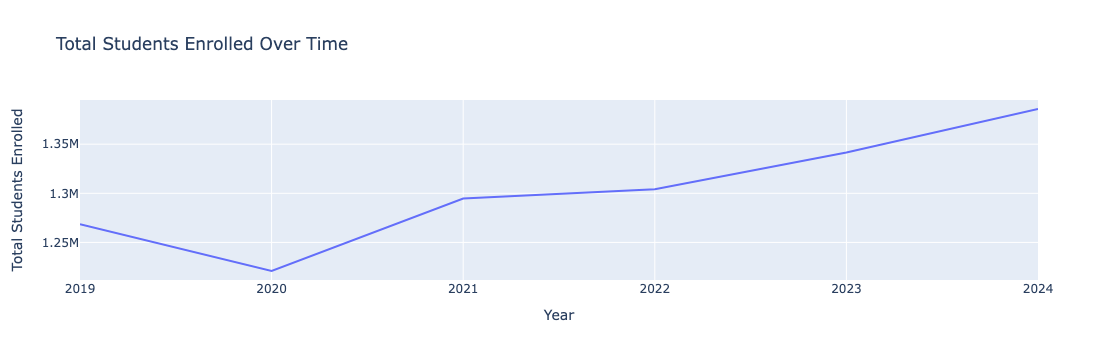

In [159]:
#For this first figure I choose a line graph to show the change over time of enrollment. 

fig1 = px.line(
    all_years,
    x='Year',
    y='Total Students Enrolled',
    title='Total Students Enrolled Over Time')
fig1

First, I’d like to explain the general structure of the academic year in Chile. In Chile, the academic year starts in March and ends in December. While some students begin their studies mid-semester (similar to the J-term at SIPA), the majority follow the standard process: they take the admissions test in December and start their academic year in March of the following year.

In this graph, we observe an increasing trend in student enrollment, except for 2020. This exception is understandable, given that 2020 was the year of the COVID-19 pandemic. Since the pandemic began in Chile around mid-March, the same month the academic year starts, it makes sense that many students chose not to enroll in university. However, aside from this anomaly, the data clearly shows a steady upward trend in enrollment over time.

In [185]:
#I want to create a second visualization now to see if there is a difference in female and male enrolment and the evolution through the years. 
gender = onlyyears_data.groupby(["Year", "Student Gender"])["Unique Code"].size().reset_index(name="Count")
gender["Student Gender"] = gender["Student Gender"].map({"1": "Men", "2": "Women"})
gender

,Year,Student Gender,Count
0,2019,Men,595637
1,2019,Women,672846
2,2020,Men,568913
3,2020,Women,651985
4,2021,Men,593534
5,2021,Women,701165
6,2022,Men,602296
7,2022,Women,701836
8,2023,Men,623543
9,2023,Women,717890


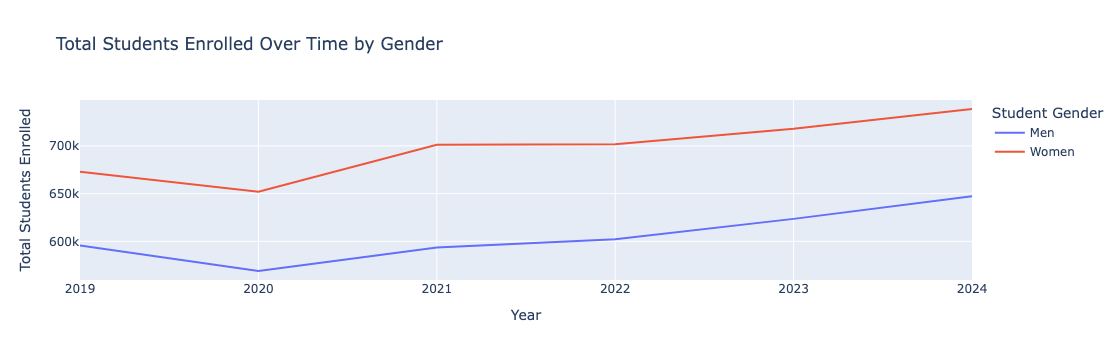

In [187]:
fig2 = px.line(
    gender,
    x='Year',
    y='Count',
    color='Student Gender',
    title='Total Students Enrolled Over Time by Gender',
    labels={'year': 'Year', 'Count': 'Total Students Enrolled', 'Student Gender':'Student Gender'})
fig2

We can see that both males and females follow the same trend. As has been observed for several years, more women enroll in higher education institutions than men.

In [197]:
#I want to create a second visualization now to see if there is a difference in female and male enrolment and the evolution through the years. 
typeofinstitution = onlyyears_data.groupby(["Year", "Institution Type_1"])["Unique Code"].size().reset_index(name="Count")
typeofinstitution["Institution Type_1"] = typeofinstitution["Institution Type_1"].map({"Institutos Profesionales": "Professional Institutes", "Universidades": "Universities", "Centros de Formación Técnica": "Technical Training Centers"})
typeofinstitution

,Year,Institution Type_1,Count
0,2019,Technical Training Centers,137928
1,2019,Professional Institutes,381412
2,2019,Universities,749143
3,2020,Technical Training Centers,130346
4,2020,Professional Institutes,362030
5,2020,Universities,728522
6,2021,Technical Training Centers,134475
7,2021,Professional Institutes,379838
8,2021,Universities,780386
9,2022,Technical Training Centers,131739


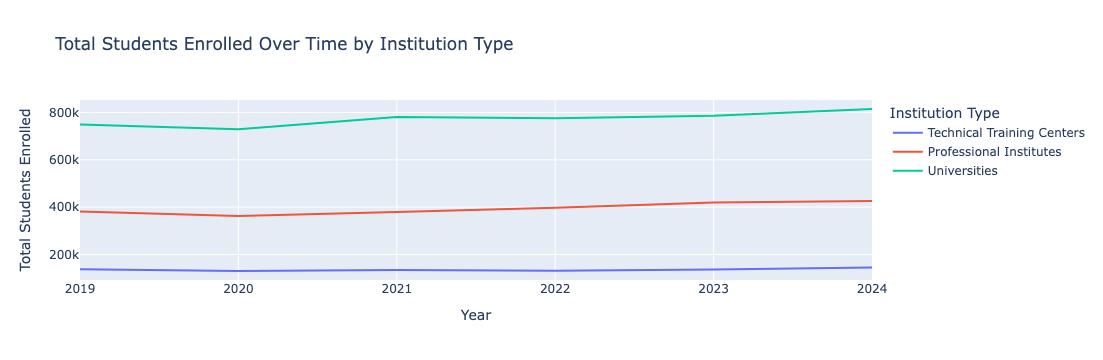

In [202]:
fig3 = px.line(
    typeofinstitution,
    x='Year',
    y='Count',
    color='Institution Type_1',
    title='Total Students Enrolled Over Time by Institution Type',
    labels={'year': 'Year', 'Count': 'Total Students Enrolled', 'Institution Type_1':'Institution Type'})
fig3

In Chile, there are three types of institutions recognized by the Ministry of Education that can grant professional and technical degrees: Universities, Professional Institutes, and Technical Training Centers. With this visualization, I aimed to analyze changes over time by institution type. However, due to the significant difference in the number of students enrolled in each type, it is challenging to determine whether there was a substantial change during this period. What this graph clearly shows is that universities have the highest number of enrolled students, followed by professional institutes, and finally, technical training centers.

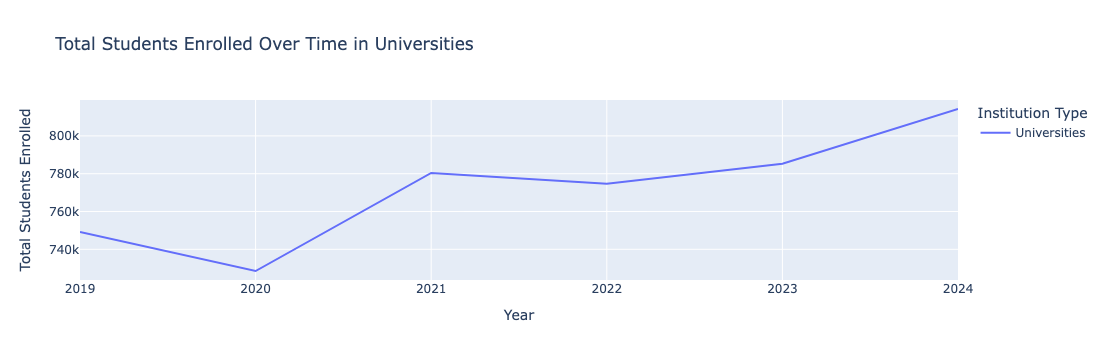

In [216]:
typeofinstitution1 = typeofinstitution[typeofinstitution['Institution Type_1']=='Universities']
fig4 = px.line(
    typeofinstitution1,
    x='Year',
    y='Count',
    color='Institution Type_1',
    title='Total Students Enrolled Over Time in Universities',
    labels={'year': 'Year', 'Count': 'Total Students Enrolled', 'Institution Type_1':'Institution Type'})
fig4

Now, I will present three separate graphs, each focusing on one of the three types of institutions. The first graph is for universities. Similar to the general trend, we observe a decrease in enrollment in 2020, followed by a recovery in 2021, another decrease in 2022, which appears unusual, and then an increase in 2023 and 2024.

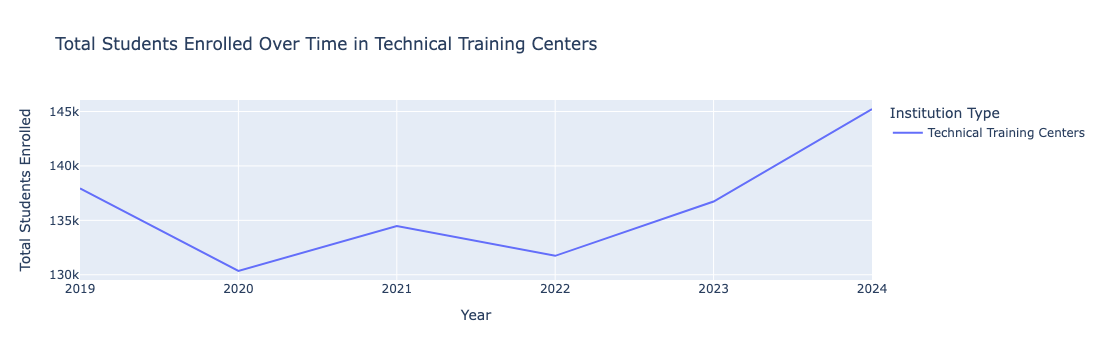

In [218]:
typeofinstitution1 = typeofinstitution[typeofinstitution['Institution Type_1']=='Technical Training Centers']
fig5 = px.line(
    typeofinstitution1,
    x='Year',
    y='Count',
    color='Institution Type_1',
    title='Total Students Enrolled Over Time in Technical Training Centers',
    labels={'year': 'Year', 'Count': 'Total Students Enrolled', 'Institution Type_1':'Institution Type'})
fig5

In this second graph, we observe the evolution of enrollment in Technical Training Centers. The trend closely mirrors that of universities, with a decrease in enrollment in 2022.


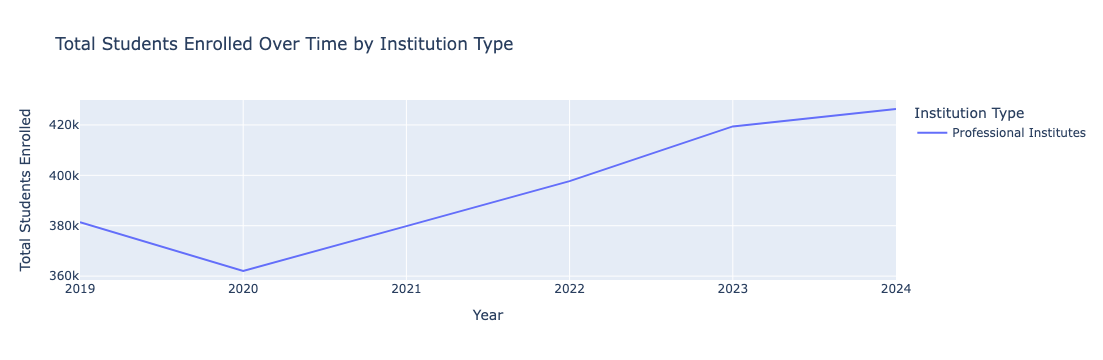

In [208]:
typeofinstitution1 = typeofinstitution[typeofinstitution['Institution Type_1']=='Professional Institutes']
fig6 = px.line(
    typeofinstitution1,
    x='Year',
    y='Count',
    color='Institution Type_1',
    title='Total Students Enrolled Over Time in Professional Institutes',
    labels={'year': 'Year', 'Count': 'Total Students Enrolled', 'Institution Type_1':'Institution Type'})
fig6

In this third graph, we observe the evolution of enrollment in Professional Institutes. Unlike universities and technical training centers, this institution type shows a consistent increase in enrollment every year following 2020.

In [141]:
#Now I want to see more detail for year 2024
year = 2024
data_year = onlyyears_data[onlyyears_data["Year"] == year]
data_year

,Year,Unique Code,Institution Name,Campus Region,Institution Type_1
0,2024,I117S1C35J4V1,IP IACC,Metropolitana,Institutos Profesionales
1,2024,I45S2C4J1V1,UNIVERSIDAD DEL DESARROLLO,Metropolitana,Universidades
2,2024,I31S2C41J1V1,UNIVERSIDAD AUTONOMA DE CHILE,Maule,Universidades
3,2024,I70S1C900J1V1,UNIVERSIDAD DE CHILE,Metropolitana,Universidades
4,2024,I143S27C34J2V1,IP AIEP,Metropolitana,Institutos Profesionales
...,...,...,...,...,...
1385809,2024,I88S1C227J1V1,UNIVERSIDAD TECNICA FEDERICO SANTA MARIA,Valparaíso,Universidades
1385810,2024,I116S36C51J1V1,IP SANTO TOMAS,Ñuble,Institutos Profesionales
1385811,2024,I86S1C1446J4V1,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,Metropolitana,Universidades
1385812,2024,I312S1C116J4V1,CFT CENCO,Metropolitana,Centros de Formación Técnica


In [225]:
data_sorted = data_year.groupby(["Institution Name", "Institution Type_1"]).size().reset_index(name="Students Enrolled")

# Sort the data by 'Students Enrolled' in descending order
data_sorted2 = data_sorted.sort_values(by="Students Enrolled", ascending=False)
data_sorted2.head(20)

,Institution Name,Institution Type_1,Students Enrolled
50,IP DUOC UC,Institutos Profesionales,105295
41,IP AIEP,Institutos Profesionales,87763
77,UNIVERSIDAD ANDRES BELLO,Universidades,64226
59,IP INACAP,Institutos Profesionales,57042
71,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,Universidades,54939
122,UNIVERSIDAD SAN SEBASTIAN,Universidades,49509
25,CFT INACAP,Centros de Formación Técnica,46795
95,UNIVERSIDAD DE CHILE,Universidades,45324
64,IP LATINOAMERICANO DE COMERCIO EXTERIOR - IPLACEX,Institutos Profesionales,41248
38,CFT SANTO TOMAS,Centros de Formación Técnica,38729


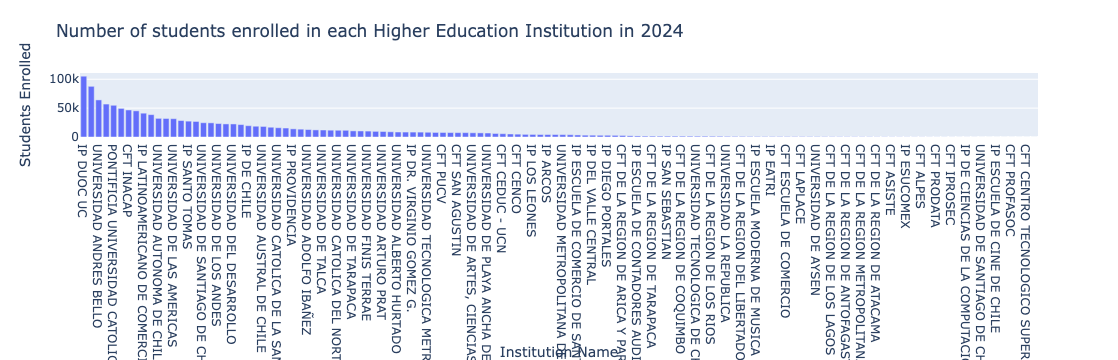

In [141]:
fig7 = px.bar(data_sorted2, 
                   x="Institution Name", 
                   y="Students Enrolled",
                   title='Number of students enrolled in each Higher Education Institution in 2024')
fig7.show()

This bar graph shows the institutions ordered by the number of students enrolled. In the top five, we see representation from all three types of institutions. Notably, IP DUOC UC, a Professional Institute, stands out as the institution with the highest number of enrolled students for 2024.

In [275]:
#Now I want to see only the top 10 
max_num = 31349
top_10 = data_sorted2["Students Enrolled"] >= max_num
top_10df = data_sorted2[top_10]
top_10df

,Institution Name,Institution Type_1,Students Enrolled
56,IP DUOC UC,Institutos Profesionales,97256
48,IP AIEP,Institutos Profesionales,94774
84,UNIVERSIDAD ANDRES BELLO,Universidades,57645
65,IP INACAP,Institutos Profesionales,46809
129,UNIVERSIDAD SAN SEBASTIAN,Universidades,44191
78,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,Universidades,42912
102,UNIVERSIDAD DE CHILE,Universidades,42904
30,CFT INACAP,Centros de Formación Técnica,41103
45,CFT SANTO TOMAS,Centros de Formación Técnica,37562
87,UNIVERSIDAD AUTONOMA DE CHILE,Universidades,31349


In [277]:
fig7_24 = px.bar(top_10df, 
                   x="Institution Name", 
                   y="Students Enrolled",
                   title='Number of students enrolled in each Higher Education Institution in 2024')

In [279]:
year = 2023
data_year = onlyyears_data[onlyyears_data["Year"] == year]
data_sorted = data_year.groupby(["Institution Name", "Institution Type_1"]).size().reset_index(name="Students Enrolled")
data_sorted2 = data_sorted.sort_values(by="Students Enrolled", ascending=False)
data_sorted2.head(10)

,Institution Name,Institution Type_1,Students Enrolled
51,IP DUOC UC,Institutos Profesionales,100780
42,IP AIEP,Institutos Profesionales,93451
79,UNIVERSIDAD ANDRES BELLO,Universidades,59075
60,IP INACAP,Institutos Profesionales,51795
124,UNIVERSIDAD SAN SEBASTIAN,Universidades,48175
97,UNIVERSIDAD DE CHILE,Universidades,45248
73,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,Universidades,43250
24,CFT INACAP,Centros de Formación Técnica,41946
39,CFT SANTO TOMAS,Centros de Formación Técnica,38762
59,IP IACC,Institutos Profesionales,35863


In [283]:
max_num = 35863
top_10 = data_sorted2["Students Enrolled"] >= max_num
top_10df = data_sorted2[top_10]

fig7_23 = px.bar(top_10df, 
                   x="Institution Name", 
                   y="Students Enrolled",
                   title='Number of students enrolled in each Higher Education Institution in 2023')

In [285]:
year = 2022
data_year = onlyyears_data[onlyyears_data["Year"] == year]
data_sorted = data_year.groupby(["Institution Name", "Institution Type_1"]).size().reset_index(name="Students Enrolled")
data_sorted2 = data_sorted.sort_values(by="Students Enrolled", ascending=False)
data_sorted2.head(10)

,Institution Name,Institution Type_1,Students Enrolled
56,IP DUOC UC,Institutos Profesionales,97256
48,IP AIEP,Institutos Profesionales,94774
84,UNIVERSIDAD ANDRES BELLO,Universidades,57645
65,IP INACAP,Institutos Profesionales,46809
129,UNIVERSIDAD SAN SEBASTIAN,Universidades,44191
78,PONTIFICIA UNIVERSIDAD CATOLICA DE CHILE,Universidades,42912
102,UNIVERSIDAD DE CHILE,Universidades,42904
30,CFT INACAP,Centros de Formación Técnica,41103
45,CFT SANTO TOMAS,Centros de Formación Técnica,37562
87,UNIVERSIDAD AUTONOMA DE CHILE,Universidades,31349


In [289]:
max_num = 31349
top_10 = data_sorted2["Students Enrolled"] >= max_num
top_10df = data_sorted2[top_10]

fig7_22 = px.bar(top_10df, 
                   x="Institution Name", 
                   y="Students Enrolled",
                   title='Number of students enrolled in each Higher Education Institution in 2022')

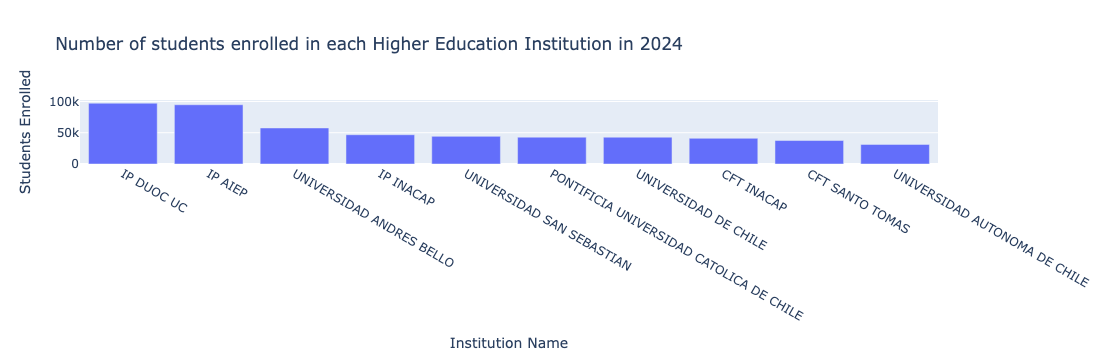

In [291]:
fig7_24

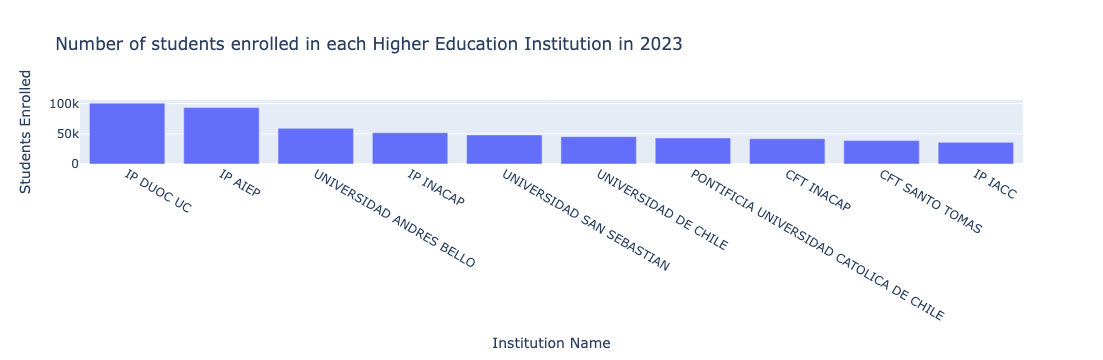

In [293]:
fig7_23

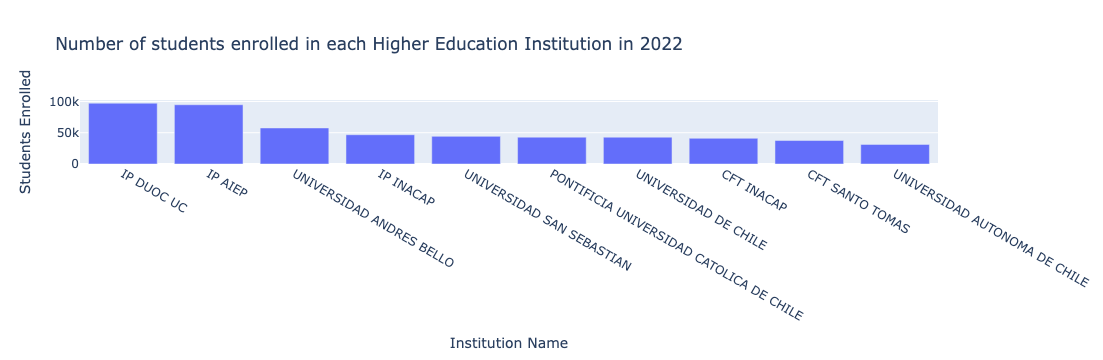

In [295]:
fig7_22

With these three graphs, I aimed to analyze whether the top 10 institutions, measured by enrollment numbers, have changed over the past three years. The top five institutions have remained consistent during this period, with IP DUOC UC maintaining the top position, followed by IP AIEP, Andrés Bello University, IP INACAP, and San Sebastián University. However, in the lower half of the top 10, we observe more variation over time. 